<a href="https://colab.research.google.com/github/AlleaFr/TeknikInformatika/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
dataset = pd.read_excel('datakelulusanmhs.xls')
dataset.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             379 non-null    float64
 13  IPK               379 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [ ]:
dataset.empty

False

In [ ]:
en = LabelEncoder()
dataset['STATUS KELULUSAN'] = en.fit_transform(dataset['STATUS KELULUSAN'])
dataset['JENIS KELAMIN'] = en.fit_transform(dataset['JENIS KELAMIN'])
dataset['STATUS MAHASISWA'] = en.fit_transform(dataset['STATUS MAHASISWA'])
dataset['STATUS NIKAH'] = en.fit_transform(dataset['STATUS NIKAH'])
dataset.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,1,0,28,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,1,1,32,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,1,0,29,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,1,1,27,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,1,0,29,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [ ]:
X = dataset[['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2','IPS 3','IPS 4','IPS 5','IPS 6','IPS 7','IPS 8' ]]
y = dataset['STATUS KELULUSAN'] # Label Tujuan Klasifikasi

In [ ]:
X

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8
0,1,0,28,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0
1,1,1,32,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0
2,1,0,29,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0
3,1,1,27,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0
4,1,0,29,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,1,23,0,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5
375,1,0,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
376,1,1,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
377,1,1,23,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0


In [ ]:
y

,STATUS KELULUSAN
0,1
1,1
2,1
3,1
4,1
...,...
374,0
375,0
376,0
377,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

#naive_bayes_model = GaussianNB()

X_train =  265
X_test =  114
y_train =  265
y_test =  114


In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0])

In [ ]:
classifier.predict_proba(X_test)

array([[9.38520667e-01, 6.14793327e-02],
       [9.98734899e-01, 1.26510076e-03],
       [9.99374026e-01, 6.25974351e-04],
       [9.99406972e-01, 5.93027602e-04],
       [3.48940711e-10, 1.00000000e+00],
       [9.98508579e-01, 1.49142107e-03],
       [9.99741842e-01, 2.58158192e-04],
       [9.69755764e-06, 9.99990302e-01],
       [9.99352982e-01, 6.47017559e-04],
       [7.04344408e-12, 1.00000000e+00],
       [9.99392622e-01, 6.07377738e-04],
       [9.99592384e-01, 4.07616264e-04],
       [9.99330504e-01, 6.69496261e-04],
       [3.85684158e-06, 9.99996143e-01],
       [9.99529226e-01, 4.70774180e-04],
       [7.85391734e-01, 2.14608266e-01],
       [9.99809761e-01, 1.90239440e-04],
       [9.99070134e-01, 9.29865695e-04],
       [9.88126390e-01, 1.18736103e-02],
       [9.98302399e-01, 1.69760106e-03],
       [9.79695341e-01, 2.03046588e-02],
       [2.54168438e-08, 9.99999975e-01],
       [5.88115851e-09, 9.99999994e-01],
       [1.38359702e-05, 9.99986164e-01],
       [1.096533

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [14 42]]


In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        58
           1       0.93      0.75      0.83        56

    accuracy                           0.85       114
   macro avg       0.87      0.85      0.85       114
weighted avg       0.86      0.85      0.85       114



In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi = %d Persen"%(akurasi*100))

Tingkat Akurasi = 85 Persen


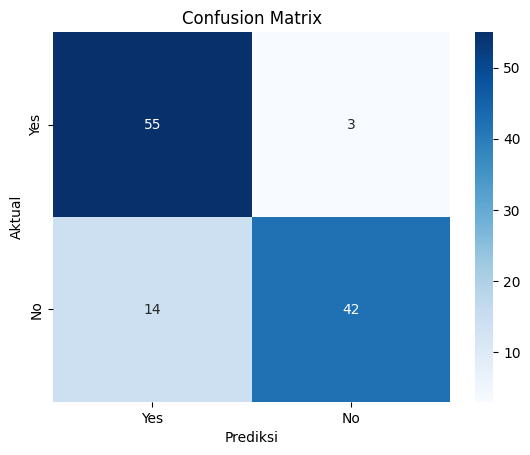

In [ ]:
y_test = ["Yes", "No"]
y_pred = ["Yes", "No"]

sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_pred, yticklabels=y_test, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()